In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorly as tl
from tensorly.decomposition import non_negative_parafac, parafac

Using numpy backend.


In [34]:
# train stimulus
# responses = np.load('cifar10_mlp_512_train.npy')
# responses = np.load('cifar10_mlp_512_label_corrupt_train.npy')

# validation stimulus
# responses = np.load('cifar10_mlp_512.npy')
# responses = np.load('cifar10_mlp_512_label_corrupt.npy')

# wide resnet
# responses = np.load('cifar10_wrn_train_full.npy')
# responses = np.load('cifar10_wrn_train_all_layers.npy')
responses = np.load('cifar10_wrn_label_corrupt_train_all_layers.npy')

# rectify responses
responses[responses<0] = 0

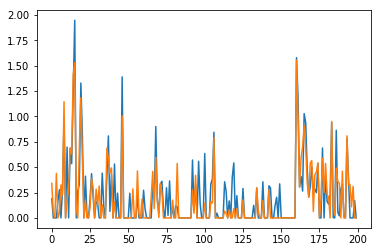

In [25]:
plt.plot(responses[0,:,0])  # early training
plt.plot(responses[0,:,-1]) # late training

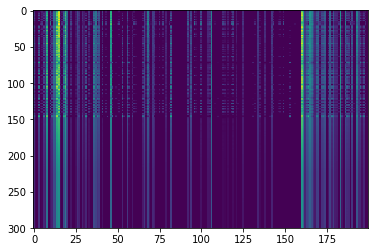

In [26]:
plt.imshow(responses[0].transpose(), aspect='auto')

In [27]:
responses.shape

(1770, 200, 300)

In [35]:
num_factors = 40
factors = non_negative_parafac(responses, rank=num_factors)

In [29]:
reconstructed_tensor = tl.kruskal_to_tensor(factors)

In [30]:
responses.shape, reconstructed_tensor.shape

((1770, 200, 300), (1770, 200, 300))

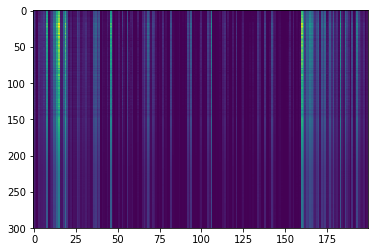

In [31]:
plt.imshow(reconstructed_tensor[0].transpose(), aspect='auto')

In [32]:
# normalized reconstruction error
np.sum((responses**2-reconstructed_tensor**2))/np.sum(responses**2)

0.07250018

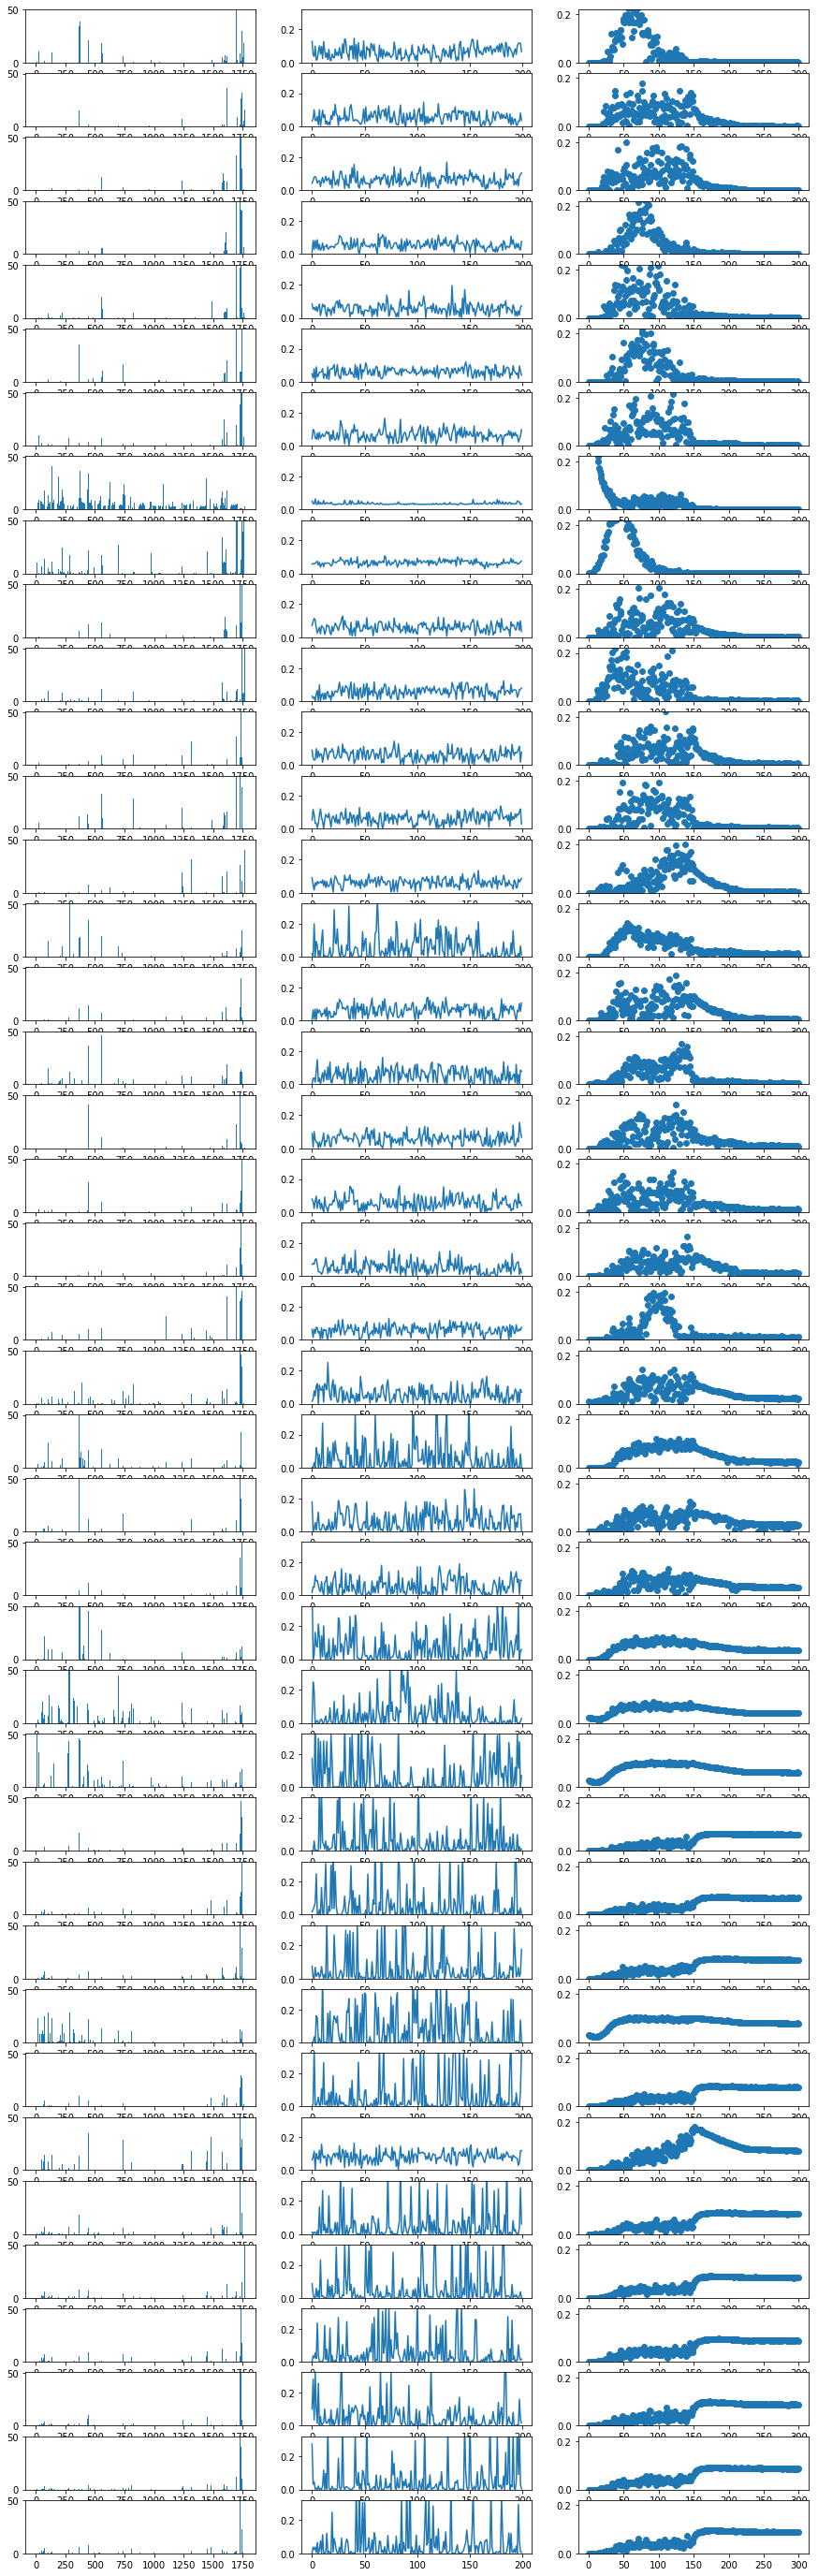

In [37]:
factor_inds = np.argsort(factors[2][-1,:])  # sort by end of training trial factor

plt.figure(figsize=(15,50))
i_cnt = 0
for ii in range(num_factors):
    plt.subplot(num_factors,3,ii*3+1)
    plt.bar(np.arange(factors[0].shape[0]), factors[0][:,factor_inds][:,ii])
    plt.ylim([0, factors[0].mean()+4*factors[0].std()])
    
    plt.subplot(num_factors,3,ii*3+2)
    plt.plot(np.arange(factors[1].shape[0]), factors[1][:,factor_inds][:,ii])
    plt.ylim([0, factors[1].mean()+4*factors[1].std()])
    
    plt.subplot(num_factors,3,ii*3+3)
    plt.scatter(np.arange(factors[2].shape[0]), factors[2][:,factor_inds][:,ii])
    plt.ylim([0, factors[2].mean()+4*factors[2].std()])
plt.savefig('cifar10_wrn_memorizing.png', bbox_inches='tight')

(0, 74.19244194030762)

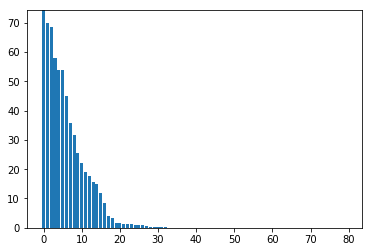

In [11]:
plt.bar(np.arange(factors[0].shape[0]), np.sort(factors[0][:,0])[::-1])
plt.ylim([0, factors[0].mean()+4*factors[0].std()])

(0, 0.4777592234313488)

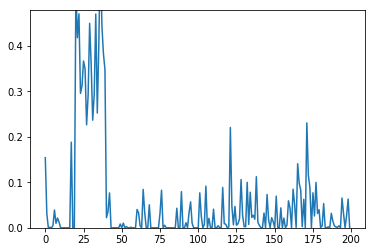

In [12]:
plt.plot(np.arange(factors[1].shape[0]), factors[1][:,0])
plt.ylim([0, factors[1].mean()+4*factors[1].std()])

(0, 0.19313639774918556)

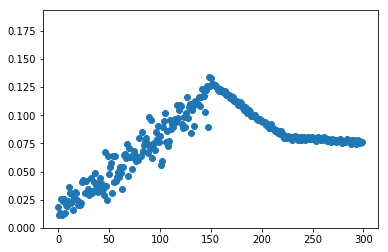

In [13]:
plt.scatter(np.arange(factors[2].shape[0]), factors[2][:,0])
plt.ylim([0, factors[2].mean()+4*factors[2].std()])